In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

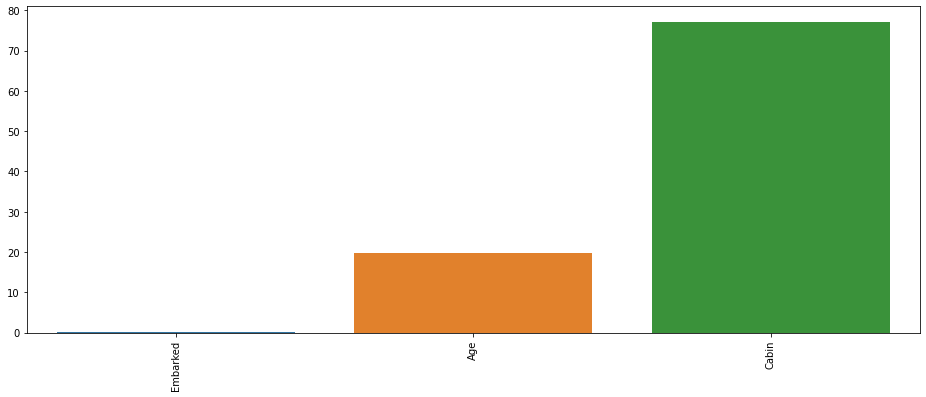

In [4]:
missing = percent_missing(df)
plt.figure(figsize = (16,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

### Cabin 

In [5]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [6]:
df['Cabin'] = df['Cabin'].fillna('None')

In [7]:
df['Cabin Class']= df['Cabin'].apply(lambda x:x[0])

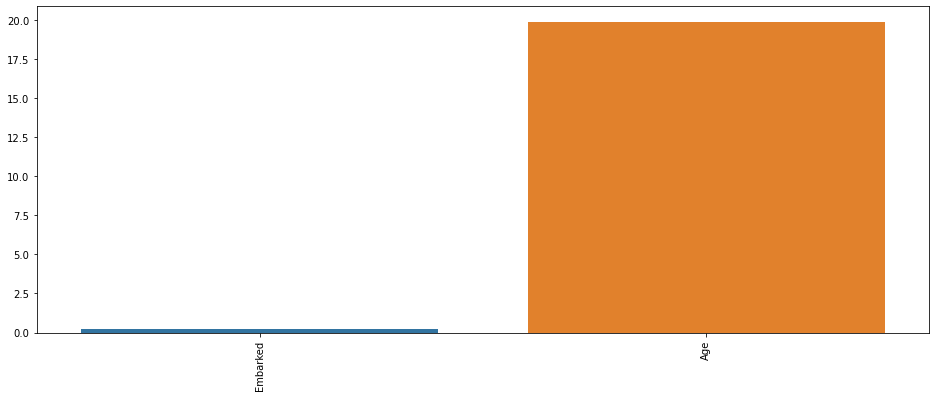

In [8]:
missing = percent_missing(df)
plt.figure(figsize = (16,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

### Age

In [9]:
df['Second Name'] = df['Name'].apply(lambda x : (x.split('.')[0]).split(',')[1].strip())

In [10]:
df[df['Second Name'] == 'Ms']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Class,Second Name
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0,None,S,N,Ms


In [11]:
names = set(df['Second Name'])
age_nonnull = df[df['Age'].notnull()]
for name in names:
    nulls = df[(df['Second Name'] == name)].fillna(df[df['Second Name'] == name]['Age'].mean())
    age_nonnull = pd.concat([age_nonnull, nulls], axis =0)

In [12]:
names

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [13]:
df.groupby('Second Name').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Second Name,,,,,,,
Capt,746.000000,0.000000,1.000000,70.000000,1.000000,1.000000,71.000000
Col,671.500000,0.500000,1.000000,58.000000,0.000000,0.000000,31.025000
Don,31.000000,0.000000,1.000000,40.000000,0.000000,0.000000,27.720800
Dr,545.857143,0.428571,1.285714,42.000000,0.571429,0.000000,49.168457
Jonkheer,823.000000,0.000000,1.000000,38.000000,0.000000,0.000000,0.000000
Lady,557.000000,1.000000,1.000000,48.000000,1.000000,0.000000,39.600000
Major,493.500000,0.500000,1.000000,48.500000,0.000000,0.000000,28.525000
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,408.884615,0.697802,2.307692,21.773973,0.714286,0.549451,43.797873


In [14]:
df = age_nonnull.drop_duplicates()
df = df.sort_index()

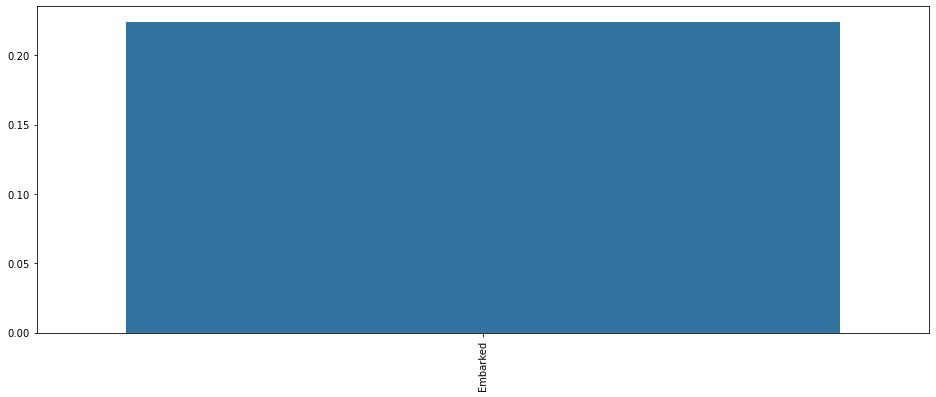

In [15]:
missing = percent_missing(df)
plt.figure(figsize = (16,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

### Fare

In [16]:
df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.454128,0.633028,37.659362,0.412844,0.353211,84.116571
2,445.956522,0.472826,29.911363,0.402174,0.380435,20.662183
3,439.154786,0.242363,26.268776,0.615071,0.393075,13.675550


### Embarked

In [17]:
df = df.drop([61,829], axis = 0)


### Dropping extra columns

In [23]:
df = df.drop(['Name', 'Cabin', 'Ticket', 'PassengerId', 'Second Name'], axis = 1)

In [19]:
# df

### Adding some columns

In [20]:
df['Family Members'] = df['SibSp']+df['Parch']

### Final Data

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin Class,Family Members
0,0,3,male,22.000000,1,0,7.2500,S,N,1
1,1,1,female,38.000000,1,0,71.2833,C,C,1
2,1,3,female,26.000000,0,0,7.9250,S,N,0
3,1,1,female,35.000000,1,0,53.1000,S,C,1
4,0,3,male,35.000000,0,0,8.0500,S,N,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,N,0
887,1,1,female,19.000000,0,0,30.0000,S,B,0
888,0,3,female,21.773973,1,2,23.4500,S,N,3
889,1,1,male,26.000000,0,0,30.0000,C,C,0


### One hard encoding

In [25]:
X_str = df[['Sex', 'Embarked', 'Cabin Class']]
X_int = df.drop(['Sex', 'Embarked', 'Cabin Class'], axis = 1)

X_str_dummies = pd.get_dummies(data = X_str, drop_first=True)

df_combined = pd.concat([X_str_dummies,X_int], axis = 1)


In [26]:
list_all = list(df_combined.columns)

In [45]:
len(df_combined.columns)

18

In [28]:
X = df_combined.drop('Survived', axis = 1)
y = df_combined['Survived']

### Data Spliting and regulating

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [31]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [105]:
X_test.shape

(267, 33)

In [32]:
penalty = ['l1']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0.8,1, 20)

In [33]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [34]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([ 6.30957344,  6.46437163,  6.62296762,  6.78545457,  6.95192796,
        7.12248558,  7.29722764,  7.4762568 ,  7.65967823,  7.8475997 ,
        8.04013161,  8.23738707,  8.43948197,  8.64653503,  8.8586679 ,
        9.07600522,  9.29867465,  9.52680703,  9.76053637, 10.        ]),
                         'penalty': ['l1']})

In [35]:
grid_model.best_params_

{'C': 6.309573444801933, 'penalty': 'l1'}

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [37]:
y_pred = grid_model.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred)

0.8352059925093633

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



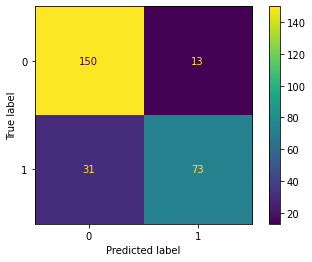

In [40]:
# Scaled so highest value=1
plot_confusion_matrix(grid_model,X_test,y_test)

# Final

In [41]:
df2 = pd.read_csv('test_final.csv')

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Sex             418 non-null    object 
 2   Age             418 non-null    float64
 3   SibSp           418 non-null    int64  
 4   Parch           418 non-null    int64  
 5   Fare            418 non-null    float64
 6   Embarked        418 non-null    object 
 7   Cabin Class     418 non-null    object 
 8   Second Name     418 non-null    object 
 9   Family Members  418 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [62]:
df2 = df2.drop('Second Name', axis = 1)

In [63]:
X_str = df2[['Sex', 'Embarked', 'Cabin Class']]
X_int = df2.drop(['Sex', 'Embarked', 'Cabin Class'], axis = 1)

X_str_dummies = pd.get_dummies(data = X_str, drop_first=True)

df2_combined = pd.concat([X_str_dummies,X_int], axis = 1)


In [54]:
df2_combined = df2.drop('Second Name', axis = 1)

In [64]:
len(df2_combined.columns)

16

In [65]:
list_all.remove('Survived')

ValueError: list.remove(x): x not in list

In [66]:
list_all

['Sex_male',
 'Embarked_Q',
 'Embarked_S',
 'Cabin Class_B',
 'Cabin Class_C',
 'Cabin Class_D',
 'Cabin Class_E',
 'Cabin Class_F',
 'Cabin Class_G',
 'Cabin Class_N',
 'Cabin Class_T',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Family Members']

In [72]:
list_current=list(df2_combined.columns)

In [73]:
list_current

['Sex_male',
 'Embarked_Q',
 'Embarked_S',
 'Cabin Class_B',
 'Cabin Class_C',
 'Cabin Class_D',
 'Cabin Class_E',
 'Cabin Class_F',
 'Cabin Class_G',
 'Cabin Class_N',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Family Members',
 'Cabin Class_T']

In [70]:
for name in list_all:
    if name in list_current:
        pass
    else:
        df2_combined[name] = 0

In [71]:
len(df2_combined.columns)

17

In [137]:
X_test2 = df2_combined.drop('Second Name_Dona', axis = 1)

In [138]:
len(X_test2.columns)

33

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
X_test2 = scaler.fit_transform(X_test2)

In [140]:
X_test2.shape

(418, 33)

In [143]:
y_pred2 = grid_model.predict(X_test2)

In [144]:
y_pred2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [146]:
df3= pd.read_csv('test.csv')

In [147]:
df3

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [148]:
len(y_pred2)

418

In [74]:
output = pd.DataFrame({'PassengerId': df3.PassengerId, 'Survived': y_pred2})
output.to_csv('submission.csv', index=False)

NameError: name 'df3' is not defined

In [151]:
submission = pd.read_csv('submission.csv')

In [152]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
